# Task 1 Machine learning on mushroom dataset




In [1]:
import sklearn
import pandas as pd 
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import OneHotEncoder 
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.linear_model import LogisticRegression
import seaborn as sns
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix
from dython.nominal import associations
import matplotlib.pyplot as plt
from dython import nominal

from sklearn.model_selection import cross_val_score



from sklearn.model_selection import train_test_split
pd.options.display.max_columns = 500
pd.set_option('display.max_rows', 200)

Here we import all of our necessary libraries, sklearn for predicitive data analysis, classification, regression, clustering and more. Pandas for data analysis and data manipulation and so forth. We use numpy for numerical computing, this provides tools for working with arrays and matrices and other numerical data. We import KneighborsClassifier, LogsiticRegression and MLPClassifier as those are the machine learning models we will use in this task. Dython we use for work on nominal data. Matplotlib

In [2]:
df = pd.read_table('agaricus-lepiota.csv', delimiter=',', header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22
0,p,x,s,n,t,p,f,c,n,k,e,e,s,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,e,c,s,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,e,c,s,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,e,e,s,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,t,e,s,s,w,w,p,w,o,e,n,a,g


We load read our data and turn it into a data frame, denoted by "df". A two-dimensional labeled data structure. 

In [3]:
#Checking for any duplicates that might skew the machines ability to learn
duplicates = df.duplicated().sum()
count = df.shape[0]
print(f'{duplicates} duplicate rows in {count} rows')

0 duplicate rows in 8124 rows


Here we check for any duplicates in our dataframe ("df"), this is an important step in cleaning and preprocessing before applying machine learning models. This is due to the fact that duplicates can inflate performance by overfitting. However we read that there are 0 duplicate rows in our 8124 rows, therefore we dont need to get rid of any.

In [4]:
column_labels = [
    'class', 'cap shape', 'cap surface', 'cap color', 'bruised', 'odor',
    'gill attachment', 'gill spacing', 'gill size', 'gill color', 
    'stalk shape', 'stalk root', 'stalk surface above ring',
    'stalk surface below ring', 'stalk color above ring',
    'stalk color below ring', 'veil type', 'veil color', 'ring number',
    'ring type', 'spore print color', 'population', 'habitat'
]

df.columns = column_labels

This step is done to replace the numbers in the top row to something more descriptive, here we use the classifications from the "agaricus-lepiota" text file. We can now see how the "1" have turned into "class", and the other numbers have turned into other descriptive words.

In [5]:
df.head()

,class,cap shape,cap surface,cap color,bruised,odor,gill attachment,gill spacing,gill size,gill color,stalk shape,stalk root,stalk surface above ring,stalk surface below ring,stalk color above ring,stalk color below ring,veil type,veil color,ring number,ring type,spore print color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,e,e,s,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,e,c,s,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,e,c,s,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,e,e,s,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,t,e,s,s,w,w,p,w,o,e,n,a,g


In [6]:
df['class'].replace(['e', 'p'], [0, 1], inplace=True)
df['stalk root'].value_counts()

b    3776
?    2480
e    1120
c     556
r     192
Name: stalk root, dtype: int64

This code is replacing the values in 'class'. It replaces 'e' (edible) with 0 and 'p' (poisonous) with 1. We change them from categorical to numerical.  
We see that there are alot of the mushrooms that have "stalk root" type "?", a whooping 30.5% of the mushrooms have "?" as its stalk root feature.

In [7]:
df['veil type'].value_counts()

p    8124
Name: veil type, dtype: int64

We count the veil type as well, and find that all the mushrooms have the same veil type. We therefor decide to drop it, as it wont impact performance.

In [8]:
df.columns.drop(['stalk root'])
df.columns.drop(['veil type'])

Index(['class', 'cap shape', 'cap surface', 'cap color', 'bruised', 'odor',
       'gill attachment', 'gill spacing', 'gill size', 'gill color',
       'stalk shape', 'stalk root', 'stalk surface above ring',
       'stalk surface below ring', 'stalk color above ring',
       'stalk color below ring', 'veil color', 'ring number', 'ring type',
       'spore print color', 'population', 'habitat'],
      dtype='object')

In [9]:
print(len(df.columns))

23


/home/yarkin/anaconda3/lib/python3.9/site-packages/dython/nominal.py:219: RuntimeWarning: Rounded U = -1.6032076067317889e-16 to 0.0. This is probably due to floating point precision issues.
  warnings.warn(


<Axes: >

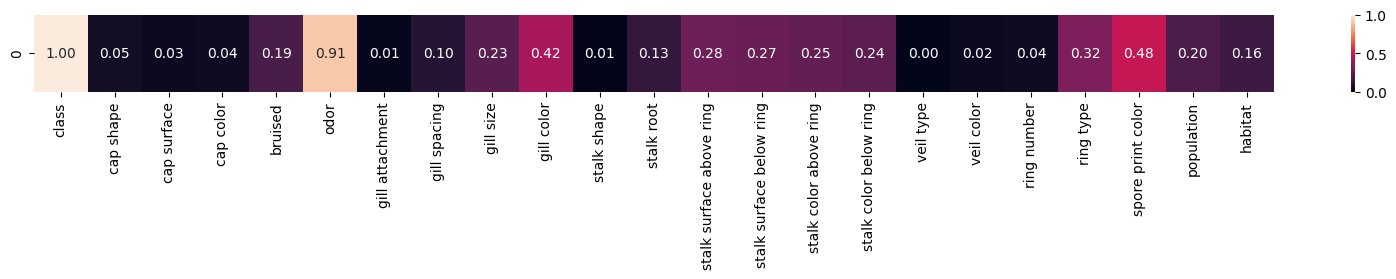

In [10]:
theil_data = [[nominal.theils_u(df["class"], df[col]) for col in df]]
plt.figure(figsize=(20,1))
sns.heatmap(theil_data, annot=True, fmt='.2f', xticklabels=df.columns)

This code is calculating the Theil's U statistic between the target variable (the 'class' column) and each feature column in the DataFrame.

The Theil's U statistic is a measure of the strength of association between two categorical variables. It ranges from 0 to 1, where 0 indicates no association and 1 indicates a strong association. The Theil's U statistic is useful for identifying which features are most informative for predicting the target variable.
The code is using a list comprehension to calculate the Theil's U statistic for each column in the DataFrame using the theils_u() function from the dython.nominal module.

The code then creates a heatmap visualization of the Theil's U statistic using the sns.heatmap() function from the Seaborn library. The heatmap is annotated with the Theil's U values for each feature and target pair.

From this heatmap we can deduce that odor has a very close correlation to the precense of poison in the mushroom. Now we can take a closer look at odor to see how it correlates with the presence of poison.

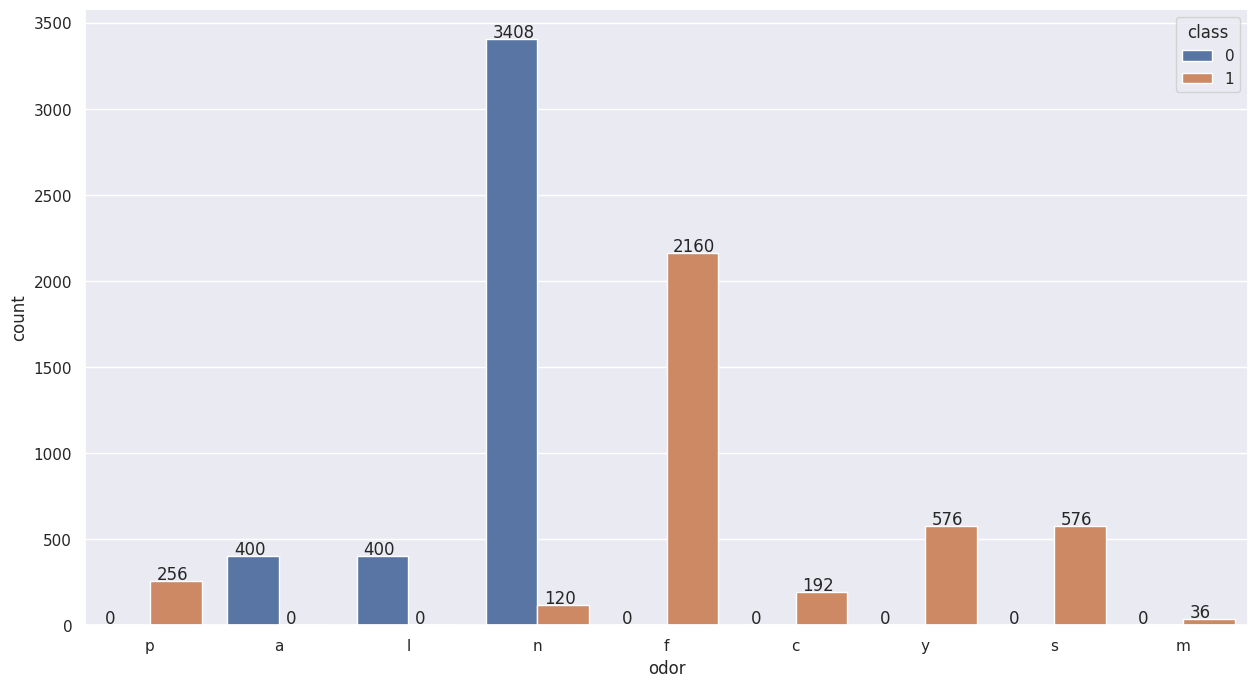

In [11]:
sns.set(rc={'figure.figsize':(15,8)})
ax=sns.countplot(x='odor',hue='class',data=df)
for p in ax.patches:
    patch_height = p.get_height()
    if np.isnan(patch_height):
        patch_height = 0    
    ax.annotate('{}'.format(int(patch_height)), (p.get_x()+0.05, patch_height+10))
plt.show()

In this graph we see that the presence of "odor f", meaning foul odor guarantees the presence of poison, there are a multitude of other smells that also guarantees poison. However "odor n", meaning no odor is weighted towards non-poisonous, however there are 120 instances of mushrooms that smell nothing that also are poisonous.

In [12]:
for column in df.columns.drop(["class"]):
    dummies = pd.get_dummies(df[column], prefix=column)
    df = pd.concat([df, dummies], axis=1)
    df.drop([column], axis=1, inplace=True)

This code is performing one-hot encoding on each categorical feature column in the DataFrame.

For each column, it creates a new DataFrame dummies using the pd.get_dummies() function, which converts the column into a set of binary columns (one for each unique value in the original column), where a 1 indicates that the corresponding value is present and a 0 indicates that it is not.

This process is done so that we convert categorical features into a numerical format, here we avoid assigning an arbitrary ordering to the categorical values that might not be meaningful for the model. And as there is no natural ordering for things like 'cap shape' or colors one-hot is well suited for this task. 

In [13]:
df.head()

,class,cap shape_b,cap shape_c,cap shape_f,cap shape_k,cap shape_s,cap shape_x,cap surface_f,cap surface_g,cap surface_s,cap surface_y,cap color_b,cap color_c,cap color_e,cap color_g,cap color_n,cap color_p,cap color_r,cap color_u,cap color_w,cap color_y,bruised_f,bruised_t,odor_a,odor_c,odor_f,odor_l,odor_m,odor_n,odor_p,odor_s,odor_y,gill attachment_a,gill attachment_f,gill spacing_c,gill spacing_w,gill size_b,gill size_n,gill color_b,gill color_e,gill color_g,gill color_h,gill color_k,gill color_n,gill color_o,gill color_p,gill color_r,gill color_u,gill color_w,gill color_y,stalk shape_e,stalk shape_t,stalk root_?,stalk root_b,stalk root_c,stalk root_e,stalk root_r,stalk surface above ring_f,stalk surface above ring_k,stalk surface above ring_s,stalk surface above ring_y,stalk surface below ring_f,stalk surface below ring_k,stalk surface below ring_s,stalk surface below ring_y,stalk color above ring_b,stalk color above ring_c,stalk color above ring_e,stalk color above ring_g,stalk color above ring_n,stalk color above ring_o,stalk color above ring_p,stalk color above ring_w,stalk color above ring_y,stalk color below ring_b,stalk color below ring_c,stalk color below ring_e,stalk color below ring_g,stalk color below ring_n,stalk color below ring_o,stalk color below ring_p,stalk color below ring_w,stalk color below ring_y,veil type_p,veil color_n,veil color_o,veil color_w,veil color_y,ring number_n,ring number_o,ring number_t,ring type_e,ring type_f,ring type_l,ring type_n,ring type_p,spore print color_b,spore print color_h,spore print color_k,spore print color_n,spore print color_o,spore print color_r,spore print color_u,spore print color_w,spore print color_y,population_a,population_c,population_n,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0
3,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0


Here we see the effects of one-hot, we have split all the categories 

In [14]:
target = df["class"]
data = df.drop("class", axis=1)
print(target.shape)
print(data.shape)
data.head()


(8124,)
(8124, 117)


,cap shape_b,cap shape_c,cap shape_f,cap shape_k,cap shape_s,cap shape_x,cap surface_f,cap surface_g,cap surface_s,cap surface_y,cap color_b,cap color_c,cap color_e,cap color_g,cap color_n,cap color_p,cap color_r,cap color_u,cap color_w,cap color_y,bruised_f,bruised_t,odor_a,odor_c,odor_f,odor_l,odor_m,odor_n,odor_p,odor_s,odor_y,gill attachment_a,gill attachment_f,gill spacing_c,gill spacing_w,gill size_b,gill size_n,gill color_b,gill color_e,gill color_g,gill color_h,gill color_k,gill color_n,gill color_o,gill color_p,gill color_r,gill color_u,gill color_w,gill color_y,stalk shape_e,stalk shape_t,stalk root_?,stalk root_b,stalk root_c,stalk root_e,stalk root_r,stalk surface above ring_f,stalk surface above ring_k,stalk surface above ring_s,stalk surface above ring_y,stalk surface below ring_f,stalk surface below ring_k,stalk surface below ring_s,stalk surface below ring_y,stalk color above ring_b,stalk color above ring_c,stalk color above ring_e,stalk color above ring_g,stalk color above ring_n,stalk color above ring_o,stalk color above ring_p,stalk color above ring_w,stalk color above ring_y,stalk color below ring_b,stalk color below ring_c,stalk color below ring_e,stalk color below ring_g,stalk color below ring_n,stalk color below ring_o,stalk color below ring_p,stalk color below ring_w,stalk color below ring_y,veil type_p,veil color_n,veil color_o,veil color_w,veil color_y,ring number_n,ring number_o,ring number_t,ring type_e,ring type_f,ring type_l,ring type_n,ring type_p,spore print color_b,spore print color_h,spore print color_k,spore print color_n,spore print color_o,spore print color_r,spore print color_u,spore print color_w,spore print color_y,population_a,population_c,population_n,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0
2,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0


In [15]:
X_train, x_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=42)

knn = KNeighborsClassifier(n_neighbors=90)
knn_scores = cross_val_score(knn, data, target, cv=5)  # 5-fold cross-validation
knn_mean_score = np.mean(knn_scores)

print(f"KNeighbor (CV): {knn_mean_score}")

/home/yarkin/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/home/yarkin/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accept

KNeighbor (CV): 0.8887155740810913


/home/yarkin/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [16]:
log_model = LogisticRegression()
log_scores = cross_val_score(log_model, data, target, cv=5)  # 5-fold cross-validation
log_mean_score = np.mean(log_scores)


In [17]:
nn_model = MLPClassifier(hidden_layer_sizes=(128, 128))
nn_scores = cross_val_score(nn_model, data, target, cv=5)  # 5-fold cross-validation
nn_mean_score = np.mean(nn_scores)


In [18]:
y_pred = nn_model.predict(x_test)
print(y_pred)

NotFittedError: This MLPClassifier instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [ ]:
cm = confusion_matrix(y_pred, y_test)
print(cm)

In [ ]:
print(f"KNeighbor (CV): {knn_mean_score}")
print(f"Logistic Regression (CV): {log_mean_score}")
print(f"Neural Network (CV): {nn_mean_score}")


In [ ]:
corr = df.corr()

corr = pd.DataFrame(corr["class"])
corr.sort_values(by=['class'], ascending=False)